# Assignment 2: Data Preparation
## Nathan Tyler
### 2/18/26

Purpose: This script is designed to serve the retail client by taking their raw product listing data, consolidating the data from multiple sources into a standardized, clean, and validated data set to be used for futher analysis by downstream users. 

## Part A: Data audit (profiling)

In [30]:
#Load the retail_dirty_210.csv into a Pandas DataFrame. @ https://raw.githubusercontent.com/ttchuang/dataset/refs/heads/master/
import pandas as pd
    
df = pd.read_csv('https://raw.githubusercontent.com/ttchuang/dataset/refs/heads/master/retail_dirty_210.csv')
#Provide information about DF, including data types and non-null counts, and show the first few rows.
df.info()
df.head()
df.tail()
print(df.head())
print("---------------------------------------------------------------")
print(df.tail(10))
#Count unique values
Sumstatsdf = df.describe()
print(Sumstatsdf)
#Find the percentage of missing values in each column.
missing_percentage = df.isnull().mean() * 100
print(missing_percentage)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product     205 non-null    object
 1   size        203 non-null    object
 2   price       184 non-null    object
 3   in_stock    194 non-null    object
 4   category    210 non-null    object
 5   date_added  197 non-null    object
dtypes: object(6)
memory usage: 10.0+ KB
            product   size   price in_stock     category   date_added
0         red shirt     XL  $47.59  unknown         Tops   2026-04-06
1   leather wallet       M   35.45    FALSE  Accessories   2025-05-22
2        blue pants     XL    56.9    FALSE      Bottoms  19-Sep-2024
3      sports socks      M   17.85      Yes  Accessories   05/30/2025
4      white tuxedo  Large     NaN        1       Formal  02-Dec-2025
---------------------------------------------------------------
             product   size      price in_stock    

# Distinct Data Problems in this set
1. All columns except the "category" colunm have more than 1 missing or null values 
    - product has 5 missing or null values (2.38%)
    - size has 7 missing or null values (3.33%)
    - price has 26 missing or null values (12.38%)
    - in_stock has 16 missing or null values (7.62%)
    - date_added has 13 missing or null values (6.19%)
2. All Data types are objects, when numeric and date time formats are more appropriate 
3. price colunm contains non numeric characters
    - It shows "free" in price instead of being "0"
4. in_stock does not use boolean format, it uses string and has inconsistancies in data entries (mixed cases)
5. date_added is stored as string and not date time 
6. Inconsistancies in sizing
    - It shows there are 24 Unique sizes, which is very unusual, typically there is sizes ranging from XS-XXL (Roughly six would be more appropriate)
7. High cardnality in Price column 
8. The data has white space and capitalization inconsitancies in formatting

# Part B: Cleaning & standardization

In [31]:
#Standardize the sting data by stripping whitespace and converting to a consistent case

df['product'] = df['product'].str.strip().str.lower()
df['size'] = df['size'].str.strip().str.upper()
df['category'] = df['category'].str.strip().str.lower()
df['in_stock'] = df['in_stock'].str.strip().str.lower()
df.head()

#Handle Blanks and N/A
df['product'] = df['product'].replace(['', 'N/A', '??'],  pd.NA)
df['size'] = df['size'].replace(['', 'N/A', '??'], pd.NA)
df['in_stock'] = df['in_stock'].replace(['', 'N/A', '??',], pd.NA)

print(df.head())
print('----------------------------------------------------------------')
print(df.tail())
print('----------------- converted sizing ---------------------------------')
#Convert valid sizes into a consistent set: XS, S, M, L, XL, XXL &  Decide what to do with invalid entries (Large, One Size, N, blanks)
sizing = {
    'XS': 'XS',
    'S': 'S', 
    'M': 'M',
    'L': 'L',
    'XL': 'XL',
    'XXL': 'XXL',
    'LARGE': 'L',
    'EXTRA LARGE': 'XL',
    'MEDIUM': 'M',
    'SMALL': 'S',
    'EXTRA SMALL': 'XS',
    'ONE SIZE': 'OFA',
    'N': pd.NA
}
df['size'] = df['size'].map(sizing)
print(df.head())
print('----------------------------------------------------------------')       
print(df.tail())



          product   size   price in_stock     category   date_added
0       red shirt     XL  $47.59  unknown         tops   2026-04-06
1  leather wallet      M   35.45    false  accessories   2025-05-22
2      blue pants     XL    56.9    false      bottoms  19-Sep-2024
3    sports socks      M   17.85      yes  accessories   05/30/2025
4    white tuxedo  LARGE     NaN        1       formal  02-Dec-2025
----------------------------------------------------------------
             product   size   price in_stock     category  date_added
205       silver tie     XS   60.07    false  accessories  01/01/2026
206       blue pants      L    84.9     true      bottoms  04/02/2025
207   leather wallet      M     NaN    false  accessories  2024-12-27
208      navy blazer    XXL  161.98    false       formal  02/16/2025
209  unknown product  LARGE   26.73       no    outerwear  03/07/2025
----------------- converted sizing ---------------------------------
          product size   price in_stoc

In [32]:
#in_stock standardization
#Convert all values into a single Boolean field:
#TRUE for TRUE, Yes, Y, 1, T, True…
#FALSE for FALSE, No, N, 0, F, false…
#Anything else (unknown, blank) → missing
#in_stock standardization


instock_bool = {
    'TRUE': True,
    'Yes': True,
    'Y': True,
    '1': True,
    'T': True,
    'True': True,
    'FALSE': False,
    'No': False,
    'N': False,
    '0': False,
    'F': False,
    'false': False,
    '': pd.NA,
    'N/A': pd.NA,
    '??': pd.NA,
    'Unknown': pd.NA
}   

df['in_stock'] = df['in_stock'].map(instock_bool)
print(df.head())
print(df.tail())


          product size   price in_stock     category   date_added
0       red shirt   XL  $47.59      NaN         tops   2026-04-06
1  leather wallet    M   35.45    False  accessories   2025-05-22
2      blue pants   XL    56.9    False      bottoms  19-Sep-2024
3    sports socks    M   17.85      NaN  accessories   05/30/2025
4    white tuxedo    L     NaN     True       formal  02-Dec-2025
             product size   price in_stock     category  date_added
205       silver tie   XS   60.07    False  accessories  01/01/2026
206       blue pants    L    84.9      NaN      bottoms  04/02/2025
207   leather wallet    M     NaN    False  accessories  2024-12-27
208      navy blazer  XXL  161.98    False       formal  02/16/2025
209  unknown product    L   26.73      NaN    outerwear  03/07/2025


In [33]:
#Price Cleaning (Most Important)
#Convert to Numeric USD Price
#Strip $, Remove USD, handle comma decimials where possible 
remove_signs = ['USD', '$', ',']

# Replace each item in the list with an empty string
for symbol in remove_signs:
    df['price'] = df['price'].str.replace(symbol, '', regex=False)
df['price'] = df['price'].apply(lambda x: '0' if isinstance(x, str) and x.strip().lower() == 'free' else x)

df['price'] = df['price'].str.strip().astype(float)



print(df.head())
print(df.tail())


          product size  price in_stock     category   date_added
0       red shirt   XL  47.59      NaN         tops   2026-04-06
1  leather wallet    M  35.45    False  accessories   2025-05-22
2      blue pants   XL  56.90    False      bottoms  19-Sep-2024
3    sports socks    M  17.85      NaN  accessories   05/30/2025
4    white tuxedo    L    NaN     True       formal  02-Dec-2025
             product size   price in_stock     category  date_added
205       silver tie   XS   60.07    False  accessories  01/01/2026
206       blue pants    L   84.90      NaN      bottoms  04/02/2025
207   leather wallet    M     NaN    False  accessories  2024-12-27
208      navy blazer  XXL  161.98    False       formal  02/16/2025
209  unknown product    L   26.73      NaN    outerwear  03/07/2025


In [34]:
#Handle impossible values:
#negative prices → invalid (set missing or remove row; justify)

print(df[df['price'] < 0])
neg_count = (df['price'] < 0).sum()
print(f'Negative prices: {neg_count}')
neg_per_total = neg_count / df.shape[0] * 100
print(f'Negative price percentage: {neg_per_total:.2f}%')

if neg_count > 0:
    df = df[df['price'] >= 0].copy()
    print(f'Dropped {neg_count} rows with negative prices.')

          product  size   price in_stock     category   date_added
6     black boots     L -270.75      NaN        shoes   09/24/2025
20   white tuxedo     M -506.68      NaN       formal   2025-07-15
24     blue pants  <NA>  -73.18      NaN      bottoms   08/10/2024
49   yellow skirt    XS  -49.88      NaN      bottoms          NaN
58   yellow skirt  <NA>  -80.55      NaN      bottoms  10-Mar-2025
61    white dress     M -181.62      NaN      dresses   10/14/2024
134  black tuxedo     L -385.31      NaN       formal   2025-08-31
150    silver tie     L  -31.50      NaN  accessories   08/24/2024
182    brown belt     L  -18.14      NaN  accessories  25-Sep-2024
200  sports socks    XL  -20.00      NaN  accessories  06-Dec-2025
Negative prices: 10
Negative price percentage: 4.76%
Dropped 10 rows with negative prices.


I decided to identify and drop the negitive prices because they represent such a small porportion of the dataset. I wanted to show what rows are priced impossibly in order to address it with the sales or marketing team. This would allow you as the analyst to ask further questions. Was this an entry error? Does this product exist?

Extreme outliers (3*IQR): 15 rows (8.621% )
         product      price
13  yellow skirt  103190.00
44  gray sweater   10440.00
48  black_tuxedo     594.01
59   navy blazer   21516.00
72           NaN    8966.00


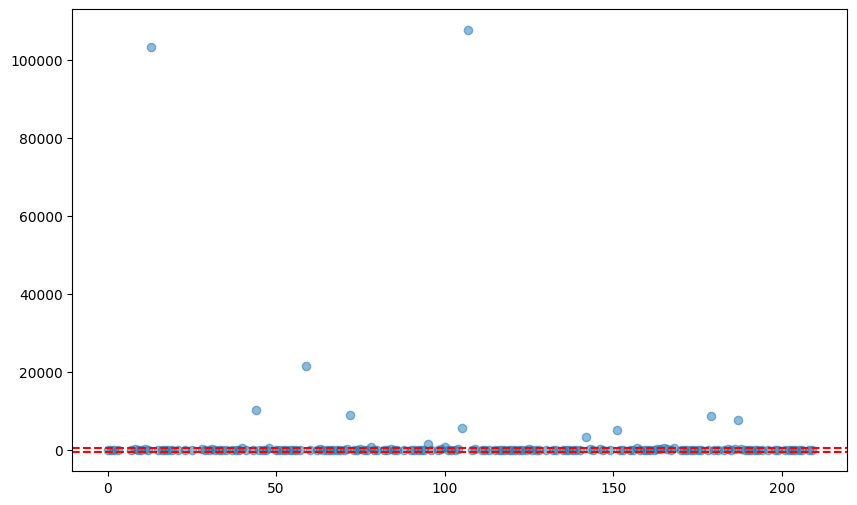

In [35]:
#extreme outliers → flag (don’t just delete silently)
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_ext = Q1 - 3 * IQR
upper_ext = Q3 + 3 * IQR

df['is_extreme_outlier'] = (df['price'] < lower_ext) | (df['price'] > upper_ext)
ext_count = int(df['is_extreme_outlier'].sum())
print(f'Extreme outliers (3*IQR): {ext_count} rows ({ext_count/len(df)*100:.3f}% )')

print(df.loc[df['is_extreme_outlier'], ['product','price']].head())

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6)) 
plt.scatter(df.index, df['price'], alpha=0.5)
plt.axhline(lower_ext, color='red', linestyle='--', label='Lower Extreme    Threshold')
plt.axhline(upper_ext, color='red', linestyle='--', label='Upper Extreme Threshold')


In [36]:
# Identify exact duplicate rows.
exact_dups = df[df.duplicated()]
print(f"Number of exact duplicate rows: {len(exact_dups)}")

# Identify near-duplicates (same product/size but slightly different price or formatting).
near_dups = df[df.duplicated(subset=['product', 'size'], keep=False)]
print(f"Number of near-duplicate rows: {len(near_dups)}")

# Parse date_added to datetime (coerce invalid formats to NaT) so sorting/comparisons work
df['date_added'] = pd.to_datetime(df['date_added'].astype(str).str.strip(), errors='coerce')

# Decide how to resolve:
# keep most recent by date_added? (NaT placed last)
df = df.sort_values('date_added', ascending=False, na_position='last')

# keep the one with valid price?
# aggregate? (Simple: keep first after sort - most recent)
df = df.drop_duplicates(subset=['product', 'size'], keep='first')

# Create a record_status or quality_flag column (examples):
# OK
# MISSING_PRICE
# INVALID_SIZE
# OUTLIER_PRICE
# SUSPECT_DATE
# DUPLICATE_REMOVED
df['quality_flag'] = 'OK'
df.loc[df['price'].isna(), 'quality_flag'] = 'MISSING_PRICE'
df.loc[df['size'].isna(), 'quality_flag'] = 'INVALID_SIZE'
df.loc[df['date_added'].isna(), 'quality_flag'] = 'INVALID_DATE'

# OUTLIER_PRICE (using 1.5*IQR)
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
iqr = q3 - q1
outlier_mask = (df['price'] < q1 - 1.5*iqr) | (df['price'] > q3 + 1.5*iqr)
df.loc[outlier_mask, 'quality_flag'] = 'OUTLIER_PRICE'

# SUSPECT_DATE (future)
today = pd.Timestamp('2026-02-19')  # Current time
# safe comparison now that date_added is datetime (NaT comparisons will be False)
df.loc[df['date_added'] > today, 'quality_flag'] = 'SUSPECT_DATE'

# Brief counts
print("\nCounts by quality_flag:")
print(df['quality_flag'].value_counts())

Number of exact duplicate rows: 1
Number of near-duplicate rows: 90

Counts by quality_flag:
quality_flag
INVALID_DATE     63
OK               32
OUTLIER_PRICE    11
SUSPECT_DATE      9
INVALID_SIZE      3
Name: count, dtype: int64


# Cleaning Log

- Standardization (string fields)
    - Strip leading/trailing whitespace for all string columns.
    - Normalize casing: product -> lower, category -> lower, size -> UPPER, in_stock -> lower.
    - Replace blanks and placeholders ['', 'N/A', '??'] with pd.NA.

- Size normalization
    - Map vendor variants to standardized sizes: XS, S, M, L, XL, XXL, OFA (one size), N -> missing.
    - Invalid/ambiguous entries to NA when not mappable.

- in_stock normalization
    - Map common tokens to boolean: TRUE/Yes/Y/1/T/True -> True; FALSE/No/N/0/F/false -> False.
    - Unknown/blank tokens to NA.

- Price cleaning & validation
    - Remove currency tokens and delimiters like USD, $, and ,.
    - Convert "free" to "0" and coerce to float.
    - Coerce any price to NaN 
        - Handle impossible values:
        - Negative prices: drop rows (10 rows removed).
        - Extreme values: flag 

- Date handling
    - Strip and parse date_added to_datetime.
    - Invalid parse -> NaT.
    - Flag future dates (compared to today) for review.

- Whitespace and case normalization before mapping.
- Use explicit mapping for categorical normalization (sizes, in_stock).
- Use NA for unknown/missing categorical values.
- Convert monetary values to numeric only after removing non-numeric items; treat "free" as 0.
- Negative monetary values are invalid -> remove after documenting, due to small porportion.
- Use 3*IQR to flag extreme outliers; do not delete.


In [37]:
# Produce two output files:

#Clean dataset (retail_clean.csv)
#standardized schema and types
#duplicates handled
#key fields usable for analytics


clean_df = df[df['quality_flag'] == 'OK']
clean_df.to_csv('retail_clean.csv', index=False)
print("Saved retail_clean.csv")

# Issue report (retail_issues.csv)
#rows that were removed or flagged, with reasons


issues_df = df[df['quality_flag'] != 'OK']
issues_df.to_csv('retail_issues.csv', index=False)
print("Saved retail_issues.csv")

Saved retail_clean.csv
Saved retail_issues.csv
